In [30]:
cctv_df['date'].value_counts()

2018(상반기)    41
2017(하반기)    41
2018(하반기)    41
2017(상반기)    41
2020(상반기)    41
2020(하반기)    41
2019(상반기)    41
2019(하반기)    41
Name: date, dtype: int64

In [31]:
## NA check
cctv_df.isnull().sum()

jur_stn     0
date        0
cctv_cnt    8
dtype: int64

In [32]:
cctv_df[cctv_df['cctv_cnt'].isnull()].head()
# --> 서울강동 데이터가 비어있음

,jur_stn,date,cctv_cnt
20,서울강동경찰서,2017(상반기),NaN
61,서울강동경찰서,2017(하반기),NaN
102,서울강동경찰서,2018(상반기),NaN
143,서울강동경찰서,2018(하반기),NaN
184,서울강동경찰서,2019(상반기),NaN


In [33]:
# fill na --> 수도권 평균으로 fillNa
cctv_df.fillna(seoul['cctv_cnt'].mean(), inplace=True)
cctv_df.isnull().sum().sum()

0

### 3. 비상벨

In [34]:
# 비상벨 개수 (bell_cnt) 관할서별 count
bell_cnt= bell_con.groupby('jur_stn').count()[['bell_us']]
bell_cnt= bell_cnt.rename(columns={'bell_us' : 'bell_cnt'})
bell_cnt = bell_cnt.reset_index()
bell_cnt.head()

,jur_stn,bell_cnt
0,마산동부경찰서,11
1,마산중부경찰서,14
2,서울강남경찰서,649
3,서울강동경찰서,2
4,서울강북경찰서,22


In [35]:
len(bell_cnt['jur_stn'].unique()) # 1개 관할서 누락

40

In [36]:
# data check
bell_cnt['bell_cnt'].describe()

count      40.000000
mean      458.350000
std       468.895459
min         2.000000
25%        39.000000
50%       346.000000
75%       818.500000
max      1780.000000
Name: bell_cnt, dtype: float64

<AxesSubplot:>

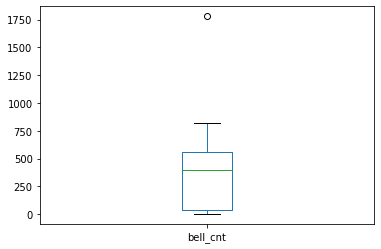

In [37]:
bell_cnt['bell_cnt'].describe().plot(kind='box')